# Initial Package Imports

The following essential Python packages are imported:

- **pandas**: For data manipulation and analysis
- **numpy**: For numerical computing and array operations 
- **matplotlib.pyplot**: For data visualization
- **%matplotlib inline**: IPython magic command to display plots inline in the notebook

These packages provide the core functionality needed for data analysis and machine learning tasks.


In [268]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor
%matplotlib inline


This cell loads the Bengaluru House Price dataset from a CSV file using pandas' read_csv() function and displays the first few rows of the data using head(). The dataset contains information about house prices and related features in Bengaluru city.


In [269]:
hp_data = pd.read_csv('../dataset/Bengaluru_House_Data.csv')
hp_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


This cell uses pandas info() function to display metadata about the DataFrame including:
- Total number of entries
- Column names and their data types
- Number of non-null values in each column
- Memory usage

This provides a quick overview of the dataset structure and helps identify any missing values.


In [270]:
hp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


The describe() function provides statistical summary of the numerical columns in the DataFrame including:

- Count of values
- Mean
- Standard deviation 
- Minimum value
- 25th percentile (Q1)
- Median (50th percentile)
- 75th percentile (Q3) 
- Maximum value

This helps understand the distribution and range of numeric features in the house price dataset.


In [271]:
hp_data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Inspecting Data Grouping by Area Type

This cell analyzes the distribution of properties across different area types using pandas groupby() and agg() functions:

- Groups the data by 'area_type' column
- Counts the number of properties in each area type category
- Provides quick insight into which area types are most common in the dataset


In [272]:
hp_data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Data Cleaning

# Feature Selection and Dimensionality Reduction

We are removing less important features to simplify the model:

1. Dropping categorical features with low predictive value:
- area_type: Already standardized built-up area in total_sqft
- availability: Future availability date not relevant for price
- society: Too many unique values, likely not significant
- balcony: Missing values and minor impact on price

2. Further dimensionality reduction can be done using PCA after:
- Handling remaining missing values
- Encoding categorical variables
- Scaling numerical features

This preprocessing will help create a simpler, more robust model.


In [273]:
df1 = hp_data.drop(['area_type', 'availability', 'balcony', 'society'], axis='columns')

In [274]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [275]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [276]:
df2 = df1.dropna()


In [277]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [278]:
df2.shape

(13246, 5)

In [279]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [280]:
def token_size(size):
    str = size.split()
    return int(str[0])


In [281]:
df2.loc[:, 'bhk']= df2['size'].apply(token_size)
df2.head()

C:\Users\abhis\AppData\Local\Temp\ipykernel_39924\353650253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'bhk']= df2['size'].apply(token_size)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [282]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [283]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [284]:
df2[~df2.total_sqft.apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [285]:
def convert_range_value_to_int(area):
    try:
        if "-" in area:
            parts = area.split("-")
            if len(parts) == 2:
                return (float(parts[0].strip()) + float(parts[1].strip())) / 2
        return float(area.strip())
    except:
        # Return None or a default value if conversion fails
        return None

In [286]:
df2.loc[:, 'area_sqft'] = df2['total_sqft'].apply(convert_range_value_to_int)


C:\Users\abhis\AppData\Local\Temp\ipykernel_39924\3539460559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'area_sqft'] = df2['total_sqft'].apply(convert_range_value_to_int)


In [287]:
df2.loc[:, 'area_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [288]:
df2.area_sqft.count()


13200

In [289]:
df2['area_sqft'].isnull().sum()

46

In [290]:
df3 = df2.copy()
df3.head()

,location,size,total_sqft,bath,price,bhk,area_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [291]:
df3.count()

location      13246
size          13246
total_sqft    13246
bath          13246
price         13246
bhk           13246
area_sqft     13200
dtype: int64

In [292]:
df3.isnull().sum()

location       0
size           0
total_sqft     0
bath           0
price          0
bhk            0
area_sqft     46
dtype: int64

In [293]:
df4 = df3.dropna()

In [294]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
area_sqft     0
dtype: int64

In [295]:
df4.count()

location      13200
size          13200
total_sqft    13200
bath          13200
price         13200
bhk           13200
area_sqft     13200
dtype: int64

In [296]:
df4.drop('total_sqft', axis=1, inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_39924\3334124955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('total_sqft', axis=1, inplace=True)


In [297]:
df4

,location,size,bath,price,bhk,area_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,2.0,51.00,2,1200.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0
13316,Richards Town,4 BHK,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0


# Feature Engineering

In [298]:
df4.loc[:3]

,location,size,bath,price,bhk,area_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0


In [299]:
df5 = df4.copy()
df5['price_per_sqft'] = df4['price']*100000/df4['area_sqft']
df5.head()

,location,size,bath,price,bhk,area_sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000


In [300]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [301]:
len(df5.location.unique())

1298

In [302]:
df5.location = df5.location.apply(lambda x: x.strip())

In [303]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [304]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [305]:
len(location_stats[location_stats<=10])

1047

In [306]:
location_stats[location_stats<=10]

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [307]:
len(df5.location.unique())

1287

In [308]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [309]:
df5

,location,size,bath,price,bhk,area_sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0,6689.834926
13316,other,4 BHK,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0,10407.336319


# Outlier Detection & Removal

In [310]:
df5[df5.area_sqft/df5.bhk <300].head()

,location,size,bath,price,bhk,area_sqft,price_per_sqft
9,other,6 Bedroom,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,7.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,3.0,100.0,3,500.0,20000.000000


In [311]:
df5.shape

(13200, 7)

In [312]:
df6 = df5[~(df5.area_sqft/df5.bhk <300)]

In [313]:
df6.shape

(12456, 7)

In [314]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [315]:
def remove_pps_outlier(df):
    df_outliers = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-std)) & (subdf.price_per_sqft <= (m+std))]
        df_outliers = pd.concat([df_outliers, reduced_df], ignore_index = True)
    return df_outliers

In [316]:
df7 = remove_pps_outlier(df6)
df7.head(10)

,location,size,bath,price,bhk,area_sqft,price_per_sqft
0,1st Block Jayanagar,4 BHK,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3 BHK,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,3 BHK,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,3 BHK,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2 BHK,2.0,148.0,2,1235.0,11983.805668
5,1st Block Jayanagar,4 BHK,4.0,413.0,4,2750.0,15018.181818
6,1st Block Jayanagar,4 BHK,4.0,368.0,4,2450.0,15020.408163
7,1st Phase JP Nagar,4 BHK,4.0,250.0,4,2825.0,8849.557522
8,1st Phase JP Nagar,3 BHK,3.0,167.0,3,1875.0,8906.666667
9,1st Phase JP Nagar,5 Bedroom,5.0,85.0,5,1500.0,5666.666667


In [317]:
df7.shape

(10242, 7)

In [318]:
df7.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

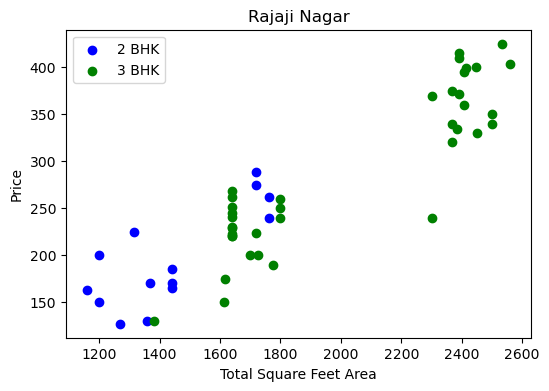

In [319]:
import matplotlib

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk ==2)]
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    matplotlib.rcParams['figure.figsize'] = (6, 4)
    plt.scatter(bhk2.area_sqft, bhk2.price, color = 'blue', label = '2 BHK')
    plt.scatter(bhk3.area_sqft, bhk3.price, color = 'green', label = '3 BHK')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()


plot_scatter_chart(df7,'Rajaji Nagar')


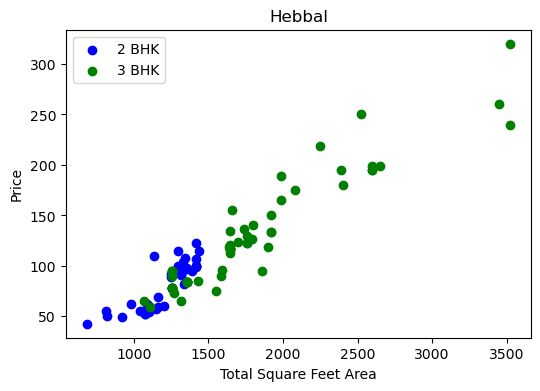

In [320]:
plot_scatter_chart(df7,'Hebbal')

In [321]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    print(exclude_indices)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

[1.1000e+01 7.0000e+00 2.3000e+01 ... 8.6210e+03 9.6720e+03 1.0214e+04]


(7317, 7)

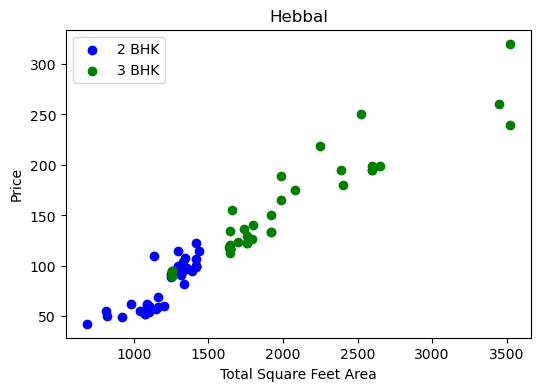

In [322]:
plot_scatter_chart(df8,"Hebbal")

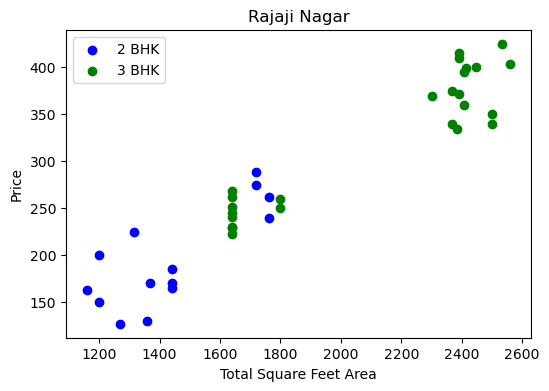

In [323]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

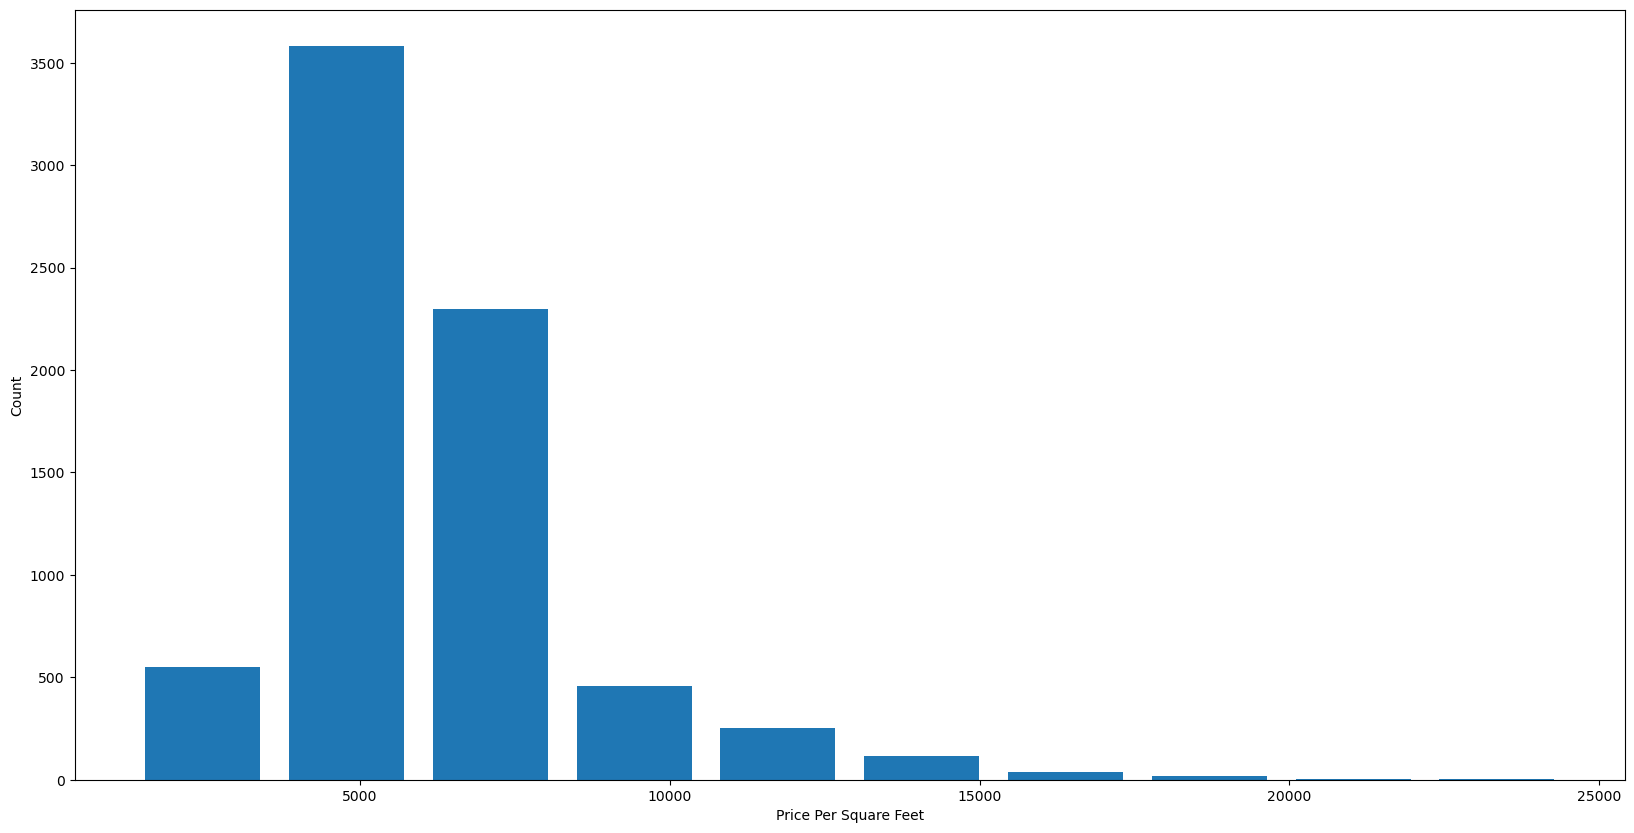

In [324]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Outlier Removal Using Bathrooms Feature

In [325]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

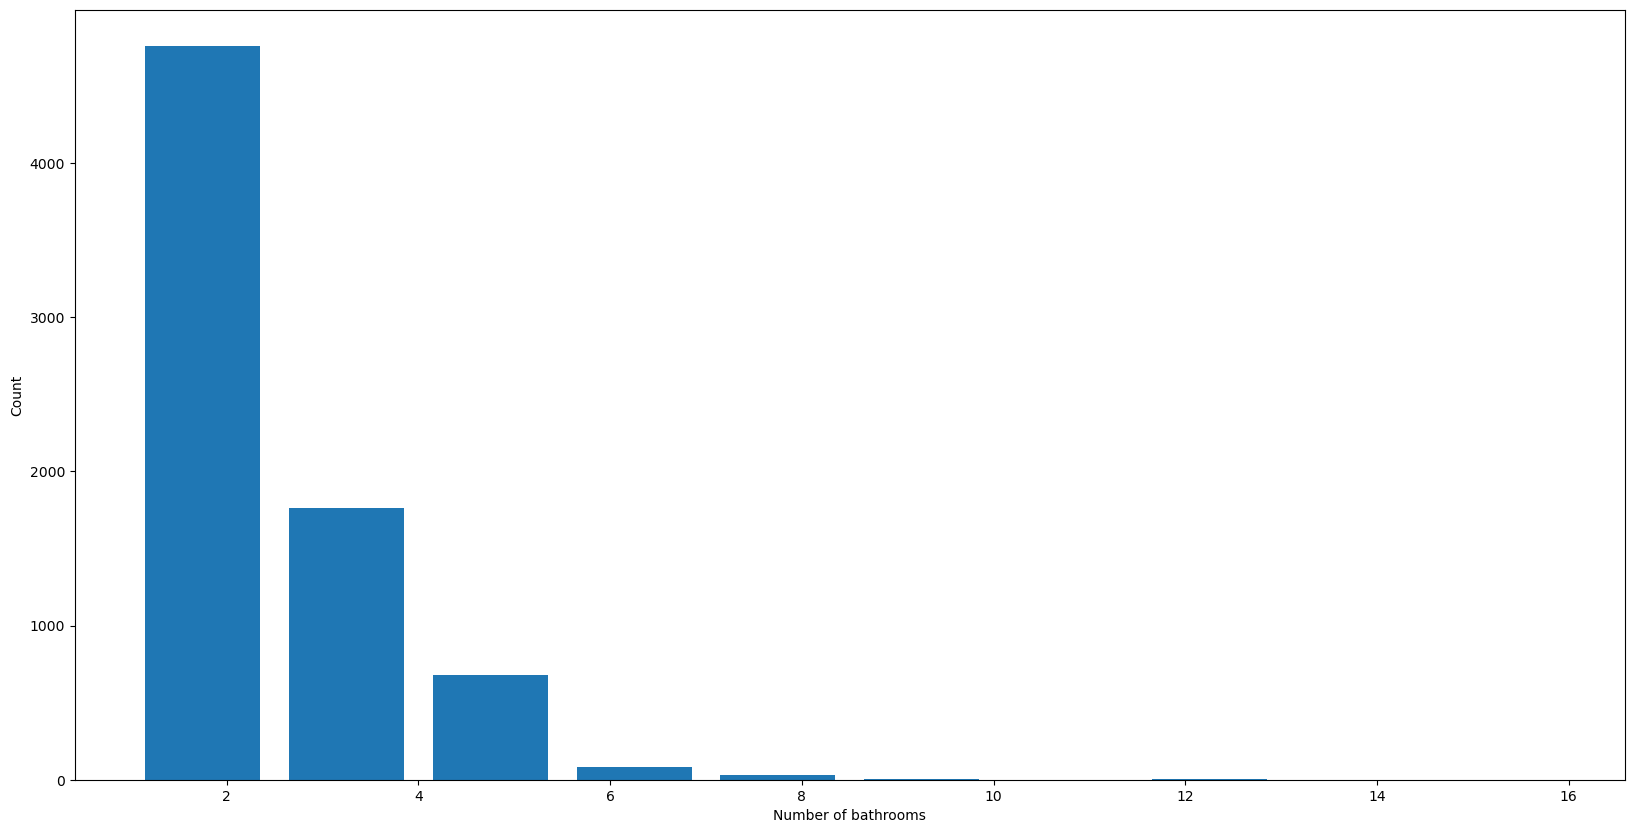

In [326]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [327]:
df8[df8.bath>10]

,location,size,bath,price,bhk,area_sqft,price_per_sqft
5277,Neeladri Nagar,10 BHK,12.0,160.0,10,4000.0,4000.000000
8483,other,10 BHK,12.0,525.0,10,12000.0,4375.000000
8572,other,16 BHK,16.0,550.0,16,10000.0,5500.000000
9306,other,11 BHK,12.0,150.0,11,6000.0,2500.000000
9637,other,13 BHK,13.0,275.0,13,5425.0,5069.124424


In [328]:
df8[df8.bath>df8.bhk+2]

,location,size,bath,price,bhk,area_sqft,price_per_sqft
1626,Chikkabanavar,4 Bedroom,7.0,80.0,4,2460.0,3252.032520
5238,Nagasandra,4 Bedroom,8.0,450.0,4,7000.0,6428.571429
6711,Thanisandra,3 BHK,6.0,116.0,3,1806.0,6423.034330
8408,other,6 BHK,9.0,1000.0,6,11338.0,8819.897689


In [329]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [330]:
df9.head(2)

,location,size,bath,price,bhk,area_sqft,price_per_sqft
0,1st Block Jayanagar,4 BHK,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3 BHK,3.0,194.0,3,1630.0,11901.840491


In [331]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,bath,price,bhk,area_sqft
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0


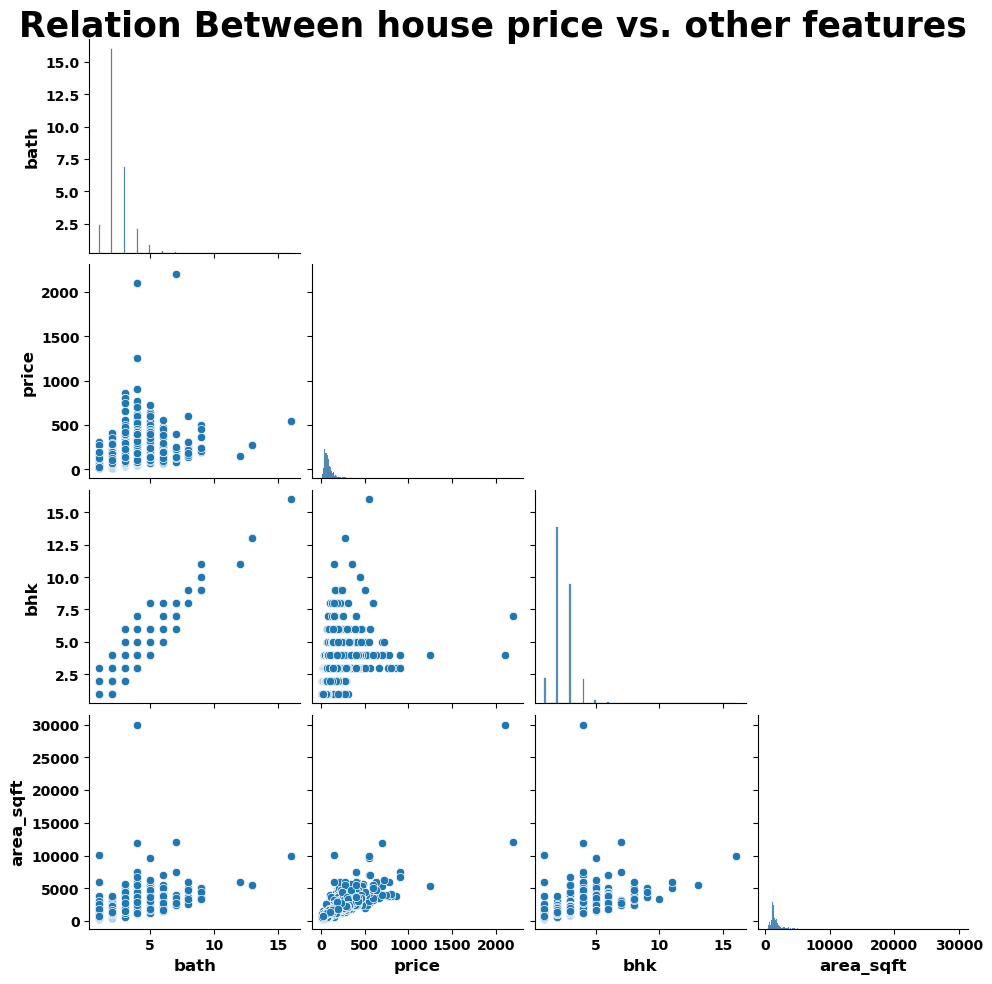

In [332]:
import seaborn as sns
def relationship_btw_features(df):
    # Extract flow columns
    home_features = [col for col in df.columns[1:]]
    home_df = df[home_features]
    # Create a pairplot
    g = sns.pairplot(home_df)

    # Removed the upper triangle to avoid redundancy
    for i, j in zip(*np.triu_indices_from(g.axes, 1)):
        g.axes[i, j].set_visible(False)

    # Make x and y labels and tick labels bold
    for ax in g.axes.flatten():
        if ax is not None:
            ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')
            ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight='bold')
            ax.tick_params(axis='both', which='major', labelsize=10)
            ax.tick_params(axis='x')  # Rotate x-axis labels for better readability
            plt.setp(ax.get_xticklabels(), fontweight='bold')
            plt.setp(ax.get_yticklabels(), fontweight='bold')

    #main title
    plt.suptitle(
        "Relation Between house price vs. other features ",
        fontsize=25, fontweight='bold'
    )

    # Adjust the position of the main title
    plt.subplots_adjust(top=0.95)

    # Show the plot
    plt.show()

relationship_btw_features(df10)

       bath  price  bhk  area_sqft
0       4.0  428.0    4     2850.0
1       3.0  194.0    3     1630.0
2       2.0  235.0    3     1875.0
3       2.0  130.0    3     1200.0
4       2.0  148.0    2     1235.0
...     ...    ...  ...        ...
10233   2.0   70.0    2     1200.0
10234   1.0  200.0    1     1800.0
10237   2.0  110.0    2     1353.0
10238   1.0   26.0    1      812.0
10241   5.0  400.0    4     3600.0

[7239 rows x 4 columns]


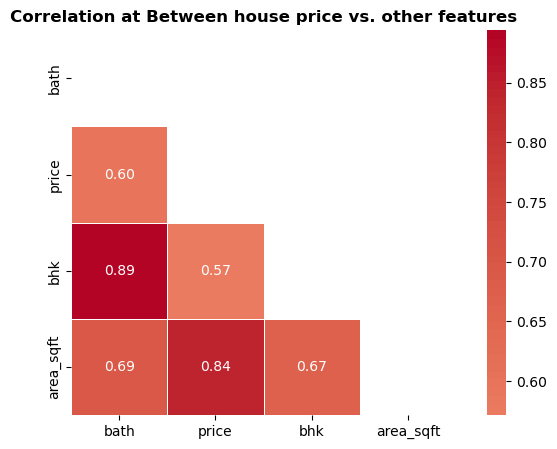

In [357]:
def correlation_plot(df):
    print(df)
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Reorder the columns to group flows and rainfall together
    # columns_order = sorted(correlation_matrix.columns, key=lambda x: ('gdf' in x, x))
    # correlation_matrix = correlation_matrix.loc[columns_order, columns_order]

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(8, 5))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=.5)

    plt.title('Correlation at Between house price vs. other features', fontweight = 'bold')
    plt.show()
correlation_plot(df10.iloc[:,1:])

## Handling categorical variable
### Encoding categorical features (location)

In [333]:
df10.location

0        1st Block Jayanagar
1        1st Block Jayanagar
2        1st Block Jayanagar
3        1st Block Jayanagar
4        1st Block Jayanagar
                ...         
10233                  other
10234                  other
10237                  other
10238                  other
10241                  other
Name: location, Length: 7239, dtype: object

In [334]:
df11 = pd.get_dummies(df10.location, dtype=int)
df11

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [335]:
df12 = df11.drop(['other'],axis='columns') # to avoid dummy trap
df12

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [336]:
df13 = pd.concat([df10, df12],axis=1)
df13

,location,bath,price,bhk,area_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,428.0,4,2850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,194.0,3,1630.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,235.0,3,1875.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2.0,130.0,3,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,148.0,2,1235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,other,2.0,70.0,2,1200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,other,1.0,200.0,1,1800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,2.0,110.0,2,1353.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,other,1.0,26.0,1,812.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [337]:
df14 = df13.drop(['location'], axis='columns')
df14

,bath,price,bhk,area_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,235.0,3,1875.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,130.0,3,1200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,148.0,2,1235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,2.0,70.0,2,1200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1.0,200.0,1,1800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,2.0,110.0,2,1353.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1.0,26.0,1,812.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
X = df14.drop('price', axis='columns')
X.head()

,bath,bhk,area_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,1235.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [339]:
Y = df14.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

# Model Building

In [340]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [341]:
X_train

,bath,bhk,area_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
7007,3.0,3,1250.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7958,3.0,3,1870.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1799,2.0,3,1585.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8170,3.0,3,1200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2962,4.0,3,1965.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,3.0,3,1335.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6474,2.0,3,1260.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6529,2.0,2,1800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6770,2.0,2,1297.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression model

In [342]:
from sklearn.linear_model import LinearRegression
LR_reg = LinearRegression()
LR_reg.fit(X_train, y_train)
LR_reg.score(X_test, y_test)

0.7971924202564102

In [343]:
from sklearn.model_selection import ShuffleSplit, cross_val_score, learning_curve
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X_train, y_train, cv=cv)

array([0.87237325, 0.83333935, 0.90593021, 0.8568372 , 0.89269431])

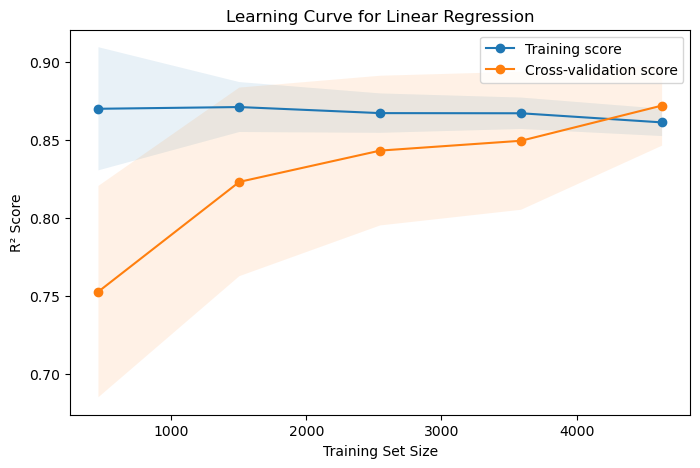

In [344]:
# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    LR_reg, X_train, y_train, cv=cv, scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")

# Shaded area for variance
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve for Linear Regression")
plt.legend(loc="best")
plt.show()

## Model Optimisation

In [345]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
def find_best_model(X, Y):
    ''' Find the best model for given data and target'''
    algo = {
        "Linear Regression": {
            'model' : LinearRegression(),
            'params' : {
                'positive' : [True,False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection': ['random', 'cyclic'],
            }
        },
        'decision tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'splitter' : ['best', 'random', ],
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [None, 5, 10],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]
            }
        },
        'XGBoost': {
            'model': XGBRegressor(eval_metric='rmse', random_state=42, n_jobs=-1),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.05, 0.1],
                'max_depth': [4, 6, 8],
                'subsample': [0.8, 1.0]
            }
        }
    }
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algo.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        score.append({
            'model' : algo_name,
            'best_params' : gs.best_params_,
            'score' : gs.best_score_
        })
    return pd.DataFrame(score, columns=['model', 'best_params', 'score'])
find_best_model(X, Y)

,model,best_params,score
0,Linear Regression,{'positive': False},0.847796
1,lasso,"{'alpha': 2, 'selection': 'random'}",0.726844
2,decision tree,"{'criterion': 'squared_error', 'splitter': 'ra...",0.728952
3,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.789570
4,XGBoost,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.811989


In [346]:
def predict_price(bath, bhk, area_sqft, location):
    ''' Predict the price of a house using the given features'''
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = bhk
    x[2] = area_sqft
    if loc_index >= 0:
        x[loc_index] = 1
    return LR_reg.predict([x])[0]

In [347]:
predict_price(3, 3, 1275, '1st Block Jayanagar')

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


205.42579765721294

In [348]:
predict_price(4, 3, 1000, '1st Phase JP Nagar')

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.88415800155393

In [349]:
predict_price(3, 3, 1000, 'Indira Nagar')

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


197.28933973940198

# Export Model for real time Prediction

In [350]:
import pickle
import os

# Create model directory if it doesn't exist
os.makedirs('../model', exist_ok=True)

# Export model to pickle file
with open('../model/bengaluru_house_price_model.pkl', 'wb') as f:
    pickle.dump(LR_reg, f)


In [351]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('../model/columns.json', 'w') as f:
    f.write(json.dumps(columns))